- mnist를 DNN으로 구현 : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset
- 콜백함수

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # minist 데이터셋
from tensorflow.keras.utils import to_categorical # One-Hot Encoding
from tensorflow.keras.models import Sequential # Model 생성
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt # 학습과정 loss, acc 볼 때
np.random.seed(4)

In [2]:
data = np.loadtxt('data/mnist_train_small.csv', 
                  delimiter = ',', 
                  skiprows = 1)
data.shape

(100, 785)

In [3]:
print(data[0].shape)
print(data[0, 0])
print(data[0, 1:].reshape(28, 28))

(785,)
5.0
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195. 

In [4]:
# 비추
# np.set_printoptions(threshold = np.inf, 
#                     linewidth = np.inf)

In [5]:
for row in data[0, 1:].reshape(28, -1):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end = ' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

5.0

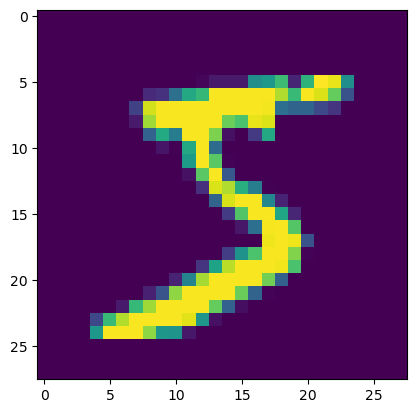

In [6]:
plt.imshow(data[0,1:].reshape(28,-1))
data[0,0]

## 위의 과정보다 더 많은 데이터를 라이브러리에서 가져옴

## 1. Dataset 생성 & 전처리

In [7]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end = '')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

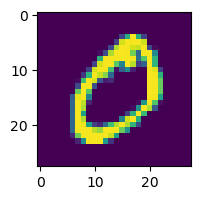

In [9]:
plt.figure(figsize = (2, 2))
plt.imshow(X_train[1])
plt.show()

In [10]:
Y_train[1]

0

In [11]:
# train dataset(60,000개)에서 train(50,000개), validation(10,000개) 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [12]:
# train dataset(학습 시 사용), validation dataset(fit에서 사용), test dataset(평가 시 사용)
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [13]:
# 독립변수 전처리: (50000, 28, 28) → (50000, 784) → float 형변환 → Scale 조정(255.0으로 나누기)
# X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
# X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
# X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [14]:
# train dataset(50,000)과 validation dataset(10,000)만 -> 700개 300개만 random으로 choice
# 0 ~ 49999까지 700개 난수(비복원추출)를 index로 사용
train_idxs = np.random.choice(50000, 700)
val_idxs   = np.random.choice(10000, 300)  

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((700, 784), (700,), (300, 784), (300,))

9


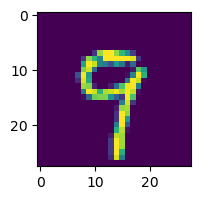

In [19]:
plt.figure(figsize = (2, 2))
plt.imshow(X_train[5].reshape(-1, 28))
print(Y_train[5])
plt.show()

In [21]:
# 종속변수 전처리: One-Hot Encoding 
# to_categorical() Numpy Array 반환
# pd.get_dummies() DataFrame 반환
print('One-Hot Encoding 전:', Y_train.shape, Y_val.shape, Y_test.shape)

# One-Hot Encoding
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)
print('One-Hot Encoding 후:', Y_train.shape, Y_val.shape, Y_test.shape)

One-Hot Encoding 전: (700,) (300,) (10000,)
One-Hot Encoding 후: (700, 10) (300, 10) (10000, 10)


In [25]:
print(Y_train[0])
print(Y_train[0].argmax())

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
8


## 2. Model 구성

activation function : https://keras.io/api/layers/activations/

In [34]:
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 2,
                activation = 'relu'))
model.add(Dense(units = 10,
                activation = 'softmax')) # 종속변수 합이 1(확률 합이 1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 1570      
                                                                 
 dense_3 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. Training Process Setting

In [36]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])

## 4. Training

In [37]:
hist = model.fit(X_train, Y_train, 
                 epochs = 1200, 
                 batch_size = 100,
                 validation_data = (X_val, Y_val))

Epoch 1/1200
7/7 [==============================] - 1s 44ms/step - loss: 2.3026 - accuracy: 0.1200 - val_loss: 2.2843 - val_accuracy: 0.1133
Epoch 2/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2756 - accuracy: 0.1500 - val_loss: 2.2631 - val_accuracy: 0.1200
Epoch 3/1200
7/7 [==============================] - 0s 14ms/step - loss: 2.2525 - accuracy: 0.1557 - val_loss: 2.2351 - val_accuracy: 0.1367
Epoch 4/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2200 - accuracy: 0.1386 - val_loss: 2.1979 - val_accuracy: 0.1267
Epoch 5/1200
7/7 [==============================] - 0s 15ms/step - loss: 2.1796 - accuracy: 0.1043 - val_loss: 2.1622 - val_accuracy: 0.1333
Epoch 6/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.1423 - accuracy: 0.1114 - val_loss: 2.1309 - val_accuracy: 0.1300
Epoch 7/1200
7/7 [==============================] - 0s 12ms/step - loss: 2.1108 - accuracy: 0.1143 - val_loss: 2.1044 - val_accuracy: 0.1367
Epoch 8/1200


Epoch 59/1200
7/7 [==============================] - 0s 13ms/step - loss: 1.5233 - accuracy: 0.4414 - val_loss: 1.6145 - val_accuracy: 0.4300
Epoch 60/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.5181 - accuracy: 0.4486 - val_loss: 1.6107 - val_accuracy: 0.4267
Epoch 61/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.5127 - accuracy: 0.4486 - val_loss: 1.6059 - val_accuracy: 0.4367
Epoch 62/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.5079 - accuracy: 0.4471 - val_loss: 1.6022 - val_accuracy: 0.4367
Epoch 63/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.5029 - accuracy: 0.4500 - val_loss: 1.5988 - val_accuracy: 0.4433
Epoch 64/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.4985 - accuracy: 0.4543 - val_loss: 1.5955 - val_accuracy: 0.4400
Epoch 65/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.4942 - accuracy: 0.4500 - val_loss: 1.5927 - val_accuracy: 0.4367
Epoch 

7/7 [==============================] - 0s 12ms/step - loss: 1.3123 - accuracy: 0.5229 - val_loss: 1.4796 - val_accuracy: 0.4900
Epoch 117/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.3086 - accuracy: 0.5271 - val_loss: 1.4784 - val_accuracy: 0.4900
Epoch 118/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.3063 - accuracy: 0.5243 - val_loss: 1.4767 - val_accuracy: 0.4867
Epoch 119/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.3035 - accuracy: 0.5243 - val_loss: 1.4757 - val_accuracy: 0.4933
Epoch 120/1200
7/7 [==============================] - 0s 13ms/step - loss: 1.3018 - accuracy: 0.5271 - val_loss: 1.4741 - val_accuracy: 0.4933
Epoch 121/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.2977 - accuracy: 0.5200 - val_loss: 1.4734 - val_accuracy: 0.4900
Epoch 122/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.2956 - accuracy: 0.5286 - val_loss: 1.4716 - val_accuracy: 0.4900
Epoch 123/1200

7/7 [==============================] - 0s 13ms/step - loss: 1.1751 - accuracy: 0.6157 - val_loss: 1.4209 - val_accuracy: 0.5267
Epoch 174/1200
7/7 [==============================] - 0s 13ms/step - loss: 1.1725 - accuracy: 0.6157 - val_loss: 1.4207 - val_accuracy: 0.5333
Epoch 175/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1714 - accuracy: 0.6186 - val_loss: 1.4199 - val_accuracy: 0.5233
Epoch 176/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1694 - accuracy: 0.6157 - val_loss: 1.4190 - val_accuracy: 0.5300
Epoch 177/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1667 - accuracy: 0.6157 - val_loss: 1.4193 - val_accuracy: 0.5300
Epoch 178/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.1647 - accuracy: 0.6200 - val_loss: 1.4175 - val_accuracy: 0.5367
Epoch 179/1200
7/7 [==============================] - 0s 13ms/step - loss: 1.1632 - accuracy: 0.6200 - val_loss: 1.4182 - val_accuracy: 0.5367
Epoch 180/1200

7/7 [==============================] - 0s 11ms/step - loss: 1.0740 - accuracy: 0.6600 - val_loss: 1.4008 - val_accuracy: 0.5700
Epoch 231/1200
7/7 [==============================] - 0s 10ms/step - loss: 1.0726 - accuracy: 0.6643 - val_loss: 1.4006 - val_accuracy: 0.5733
Epoch 232/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0711 - accuracy: 0.6671 - val_loss: 1.4005 - val_accuracy: 0.5700
Epoch 233/1200
7/7 [==============================] - 0s 13ms/step - loss: 1.0696 - accuracy: 0.6614 - val_loss: 1.4010 - val_accuracy: 0.5700
Epoch 234/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.0680 - accuracy: 0.6657 - val_loss: 1.4021 - val_accuracy: 0.5600
Epoch 235/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0667 - accuracy: 0.6657 - val_loss: 1.4009 - val_accuracy: 0.5767
Epoch 236/1200
7/7 [==============================] - 0s 11ms/step - loss: 1.0652 - accuracy: 0.6700 - val_loss: 1.4016 - val_accuracy: 0.5733
Epoch 237/1200

7/7 [==============================] - 0s 14ms/step - loss: 0.9962 - accuracy: 0.6943 - val_loss: 1.4057 - val_accuracy: 0.5700
Epoch 288/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.9945 - accuracy: 0.6929 - val_loss: 1.4041 - val_accuracy: 0.5733
Epoch 289/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9944 - accuracy: 0.6971 - val_loss: 1.4068 - val_accuracy: 0.5733
Epoch 290/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.9926 - accuracy: 0.6886 - val_loss: 1.4056 - val_accuracy: 0.5767
Epoch 291/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.9914 - accuracy: 0.6914 - val_loss: 1.4051 - val_accuracy: 0.5867
Epoch 292/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.9900 - accuracy: 0.6914 - val_loss: 1.4066 - val_accuracy: 0.5733
Epoch 293/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.9891 - accuracy: 0.6929 - val_loss: 1.4073 - val_accuracy: 0.5800
Epoch 294/1200

7/7 [==============================] - 0s 16ms/step - loss: 0.9337 - accuracy: 0.7157 - val_loss: 1.4259 - val_accuracy: 0.5733
Epoch 345/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.9326 - accuracy: 0.7114 - val_loss: 1.4255 - val_accuracy: 0.5700
Epoch 346/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.9325 - accuracy: 0.7214 - val_loss: 1.4267 - val_accuracy: 0.5700
Epoch 347/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.9302 - accuracy: 0.7200 - val_loss: 1.4304 - val_accuracy: 0.5700
Epoch 348/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.9299 - accuracy: 0.7143 - val_loss: 1.4271 - val_accuracy: 0.5767
Epoch 349/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.9284 - accuracy: 0.7214 - val_loss: 1.4267 - val_accuracy: 0.5700
Epoch 350/1200
7/7 [==============================] - 0s 10ms/step - loss: 0.9273 - accuracy: 0.7200 - val_loss: 1.4304 - val_accuracy: 0.5700
Epoch 351/1200

7/7 [==============================] - 0s 14ms/step - loss: 0.8781 - accuracy: 0.7386 - val_loss: 1.4613 - val_accuracy: 0.5800
Epoch 402/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.8772 - accuracy: 0.7343 - val_loss: 1.4594 - val_accuracy: 0.5767
Epoch 403/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.8770 - accuracy: 0.7400 - val_loss: 1.4613 - val_accuracy: 0.5833
Epoch 404/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.8756 - accuracy: 0.7386 - val_loss: 1.4637 - val_accuracy: 0.5833
Epoch 405/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.8746 - accuracy: 0.7371 - val_loss: 1.4667 - val_accuracy: 0.5833
Epoch 406/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.8735 - accuracy: 0.7400 - val_loss: 1.4646 - val_accuracy: 0.5833
Epoch 407/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.8732 - accuracy: 0.7386 - val_loss: 1.4637 - val_accuracy: 0.5833
Epoch 408/1200

7/7 [==============================] - 0s 12ms/step - loss: 0.8325 - accuracy: 0.7614 - val_loss: 1.5012 - val_accuracy: 0.5833
Epoch 459/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.8320 - accuracy: 0.7629 - val_loss: 1.5037 - val_accuracy: 0.5800
Epoch 460/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.8308 - accuracy: 0.7643 - val_loss: 1.5026 - val_accuracy: 0.5833
Epoch 461/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.8297 - accuracy: 0.7643 - val_loss: 1.5053 - val_accuracy: 0.5833
Epoch 462/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.8287 - accuracy: 0.7629 - val_loss: 1.5042 - val_accuracy: 0.5833
Epoch 463/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.8285 - accuracy: 0.7600 - val_loss: 1.5052 - val_accuracy: 0.5833
Epoch 464/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.8277 - accuracy: 0.7586 - val_loss: 1.5077 - val_accuracy: 0.5767
Epoch 465/1200

7/7 [==============================] - 0s 13ms/step - loss: 0.7929 - accuracy: 0.7829 - val_loss: 1.5492 - val_accuracy: 0.5767
Epoch 516/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7922 - accuracy: 0.7871 - val_loss: 1.5510 - val_accuracy: 0.5767
Epoch 517/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7918 - accuracy: 0.7814 - val_loss: 1.5495 - val_accuracy: 0.5700
Epoch 518/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.7915 - accuracy: 0.7829 - val_loss: 1.5526 - val_accuracy: 0.5733
Epoch 519/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.7906 - accuracy: 0.7871 - val_loss: 1.5517 - val_accuracy: 0.5767
Epoch 520/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7902 - accuracy: 0.7829 - val_loss: 1.5537 - val_accuracy: 0.5733
Epoch 521/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.7892 - accuracy: 0.7814 - val_loss: 1.5568 - val_accuracy: 0.5767
Epoch 522/1200

7/7 [==============================] - 0s 11ms/step - loss: 0.7585 - accuracy: 0.7929 - val_loss: 1.6091 - val_accuracy: 0.5700
Epoch 573/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7581 - accuracy: 0.7943 - val_loss: 1.6067 - val_accuracy: 0.5667
Epoch 574/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.7569 - accuracy: 0.7943 - val_loss: 1.6126 - val_accuracy: 0.5633
Epoch 575/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7570 - accuracy: 0.7957 - val_loss: 1.6102 - val_accuracy: 0.5633
Epoch 576/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7566 - accuracy: 0.7986 - val_loss: 1.6106 - val_accuracy: 0.5600
Epoch 577/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.7562 - accuracy: 0.7971 - val_loss: 1.6126 - val_accuracy: 0.5600
Epoch 578/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.7552 - accuracy: 0.7971 - val_loss: 1.6121 - val_accuracy: 0.5633
Epoch 579/1200

7/7 [==============================] - 0s 11ms/step - loss: 0.7234 - accuracy: 0.8000 - val_loss: 1.6688 - val_accuracy: 0.5533
Epoch 630/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.7224 - accuracy: 0.8043 - val_loss: 1.6702 - val_accuracy: 0.5500
Epoch 631/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.7223 - accuracy: 0.8043 - val_loss: 1.6721 - val_accuracy: 0.5533
Epoch 632/1200
7/7 [==============================] - 0s 15ms/step - loss: 0.7211 - accuracy: 0.8014 - val_loss: 1.6747 - val_accuracy: 0.5467
Epoch 633/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.7208 - accuracy: 0.8014 - val_loss: 1.6733 - val_accuracy: 0.5533
Epoch 634/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.7207 - accuracy: 0.8029 - val_loss: 1.6742 - val_accuracy: 0.5533
Epoch 635/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.7195 - accuracy: 0.8043 - val_loss: 1.6772 - val_accuracy: 0.5467
Epoch 636/1200

7/7 [==============================] - 0s 11ms/step - loss: 0.6912 - accuracy: 0.8143 - val_loss: 1.7333 - val_accuracy: 0.5533
Epoch 687/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.6906 - accuracy: 0.8157 - val_loss: 1.7251 - val_accuracy: 0.5500
Epoch 688/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6908 - accuracy: 0.8171 - val_loss: 1.7313 - val_accuracy: 0.5567
Epoch 689/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.6892 - accuracy: 0.8129 - val_loss: 1.7373 - val_accuracy: 0.5533
Epoch 690/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.6892 - accuracy: 0.8186 - val_loss: 1.7356 - val_accuracy: 0.5567
Epoch 691/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6882 - accuracy: 0.8100 - val_loss: 1.7351 - val_accuracy: 0.5567
Epoch 692/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.6883 - accuracy: 0.8171 - val_loss: 1.7393 - val_accuracy: 0.5567
Epoch 693/1200

7/7 [==============================] - 0s 17ms/step - loss: 0.6632 - accuracy: 0.8286 - val_loss: 1.7966 - val_accuracy: 0.5433
Epoch 744/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.6626 - accuracy: 0.8286 - val_loss: 1.7975 - val_accuracy: 0.5500
Epoch 745/1200
7/7 [==============================] - 0s 17ms/step - loss: 0.6621 - accuracy: 0.8286 - val_loss: 1.8038 - val_accuracy: 0.5433
Epoch 746/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.6614 - accuracy: 0.8300 - val_loss: 1.8056 - val_accuracy: 0.5433
Epoch 747/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.6617 - accuracy: 0.8257 - val_loss: 1.7956 - val_accuracy: 0.5500
Epoch 748/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.6609 - accuracy: 0.8300 - val_loss: 1.8018 - val_accuracy: 0.5433
Epoch 749/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.6606 - accuracy: 0.8300 - val_loss: 1.8037 - val_accuracy: 0.5500
Epoch 750/1200

7/7 [==============================] - 0s 14ms/step - loss: 0.6350 - accuracy: 0.8414 - val_loss: 1.8650 - val_accuracy: 0.5467
Epoch 801/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6341 - accuracy: 0.8414 - val_loss: 1.8685 - val_accuracy: 0.5467
Epoch 802/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.6335 - accuracy: 0.8443 - val_loss: 1.8680 - val_accuracy: 0.5467
Epoch 803/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6330 - accuracy: 0.8443 - val_loss: 1.8746 - val_accuracy: 0.5533
Epoch 804/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.6337 - accuracy: 0.8400 - val_loss: 1.8744 - val_accuracy: 0.5500
Epoch 805/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.6325 - accuracy: 0.8429 - val_loss: 1.8752 - val_accuracy: 0.5500
Epoch 806/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.6319 - accuracy: 0.8414 - val_loss: 1.8746 - val_accuracy: 0.5500
Epoch 807/1200

7/7 [==============================] - 0s 10ms/step - loss: 0.6099 - accuracy: 0.8457 - val_loss: 1.9343 - val_accuracy: 0.5367
Epoch 858/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.6095 - accuracy: 0.8486 - val_loss: 1.9382 - val_accuracy: 0.5467
Epoch 859/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.6088 - accuracy: 0.8471 - val_loss: 1.9434 - val_accuracy: 0.5467
Epoch 860/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6082 - accuracy: 0.8514 - val_loss: 1.9488 - val_accuracy: 0.5533
Epoch 861/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.6080 - accuracy: 0.8486 - val_loss: 1.9493 - val_accuracy: 0.5500
Epoch 862/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.6072 - accuracy: 0.8486 - val_loss: 1.9537 - val_accuracy: 0.5500
Epoch 863/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.6073 - accuracy: 0.8500 - val_loss: 1.9491 - val_accuracy: 0.5467
Epoch 864/1200


7/7 [==============================] - 0s 11ms/step - loss: 0.5860 - accuracy: 0.8543 - val_loss: 2.0180 - val_accuracy: 0.5400
Epoch 915/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5862 - accuracy: 0.8514 - val_loss: 2.0153 - val_accuracy: 0.5367
Epoch 916/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5852 - accuracy: 0.8543 - val_loss: 2.0184 - val_accuracy: 0.5400
Epoch 917/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5851 - accuracy: 0.8500 - val_loss: 2.0178 - val_accuracy: 0.5400
Epoch 918/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5846 - accuracy: 0.8543 - val_loss: 2.0211 - val_accuracy: 0.5433
Epoch 919/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.5839 - accuracy: 0.8543 - val_loss: 2.0156 - val_accuracy: 0.5400
Epoch 920/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5839 - accuracy: 0.8543 - val_loss: 2.0228 - val_accuracy: 0.5467
Epoch 921/1200

7/7 [==============================] - 0s 12ms/step - loss: 0.5634 - accuracy: 0.8543 - val_loss: 2.0942 - val_accuracy: 0.5367
Epoch 972/1200
7/7 [==============================] - 0s 9ms/step - loss: 0.5633 - accuracy: 0.8557 - val_loss: 2.0891 - val_accuracy: 0.5300
Epoch 973/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5631 - accuracy: 0.8586 - val_loss: 2.0987 - val_accuracy: 0.5333
Epoch 974/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5621 - accuracy: 0.8543 - val_loss: 2.0963 - val_accuracy: 0.5333
Epoch 975/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.5619 - accuracy: 0.8543 - val_loss: 2.1021 - val_accuracy: 0.5333
Epoch 976/1200
7/7 [==============================] - 0s 18ms/step - loss: 0.5615 - accuracy: 0.8600 - val_loss: 2.1064 - val_accuracy: 0.5333
Epoch 977/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.5618 - accuracy: 0.8529 - val_loss: 2.1036 - val_accuracy: 0.5367
Epoch 978/1200


7/7 [==============================] - 0s 11ms/step - loss: 0.5383 - accuracy: 0.8586 - val_loss: 2.1710 - val_accuracy: 0.5267
Epoch 1029/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5383 - accuracy: 0.8629 - val_loss: 2.1768 - val_accuracy: 0.5167
Epoch 1030/1200
7/7 [==============================] - 0s 16ms/step - loss: 0.5374 - accuracy: 0.8600 - val_loss: 2.1799 - val_accuracy: 0.5200
Epoch 1031/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5375 - accuracy: 0.8629 - val_loss: 2.1740 - val_accuracy: 0.5333
Epoch 1032/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.5380 - accuracy: 0.8657 - val_loss: 2.1812 - val_accuracy: 0.5200
Epoch 1033/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.5366 - accuracy: 0.8614 - val_loss: 2.1800 - val_accuracy: 0.5167
Epoch 1034/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5364 - accuracy: 0.8586 - val_loss: 2.1818 - val_accuracy: 0.5200
Epoch 10

7/7 [==============================] - 0s 14ms/step - loss: 0.5146 - accuracy: 0.8714 - val_loss: 2.2533 - val_accuracy: 0.5200
Epoch 1086/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5137 - accuracy: 0.8771 - val_loss: 2.2680 - val_accuracy: 0.5200
Epoch 1087/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5132 - accuracy: 0.8757 - val_loss: 2.2587 - val_accuracy: 0.5167
Epoch 1088/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.5130 - accuracy: 0.8771 - val_loss: 2.2642 - val_accuracy: 0.5167
Epoch 1089/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.5124 - accuracy: 0.8771 - val_loss: 2.2687 - val_accuracy: 0.5133
Epoch 1090/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.5122 - accuracy: 0.8814 - val_loss: 2.2670 - val_accuracy: 0.5167
Epoch 1091/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.5113 - accuracy: 0.8786 - val_loss: 2.2696 - val_accuracy: 0.5200
Epoch 10

7/7 [==============================] - 0s 14ms/step - loss: 0.4937 - accuracy: 0.8871 - val_loss: 2.3497 - val_accuracy: 0.5200
Epoch 1143/1200
7/7 [==============================] - 0s 13ms/step - loss: 0.4936 - accuracy: 0.8871 - val_loss: 2.3488 - val_accuracy: 0.5200
Epoch 1144/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.4927 - accuracy: 0.8914 - val_loss: 2.3521 - val_accuracy: 0.5167
Epoch 1145/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.4937 - accuracy: 0.8886 - val_loss: 2.3488 - val_accuracy: 0.5200
Epoch 1146/1200
7/7 [==============================] - 0s 11ms/step - loss: 0.4924 - accuracy: 0.8886 - val_loss: 2.3524 - val_accuracy: 0.5200
Epoch 1147/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.4919 - accuracy: 0.8886 - val_loss: 2.3506 - val_accuracy: 0.5233
Epoch 1148/1200
7/7 [==============================] - 0s 12ms/step - loss: 0.4916 - accuracy: 0.8886 - val_loss: 2.3594 - val_accuracy: 0.5167
Epoch 11

7/7 [==============================] - 0s 14ms/step - loss: 0.4749 - accuracy: 0.8914 - val_loss: 2.4423 - val_accuracy: 0.5100
Epoch 1200/1200
7/7 [==============================] - 0s 14ms/step - loss: 0.4745 - accuracy: 0.8914 - val_loss: 2.4445 - val_accuracy: 0.5033


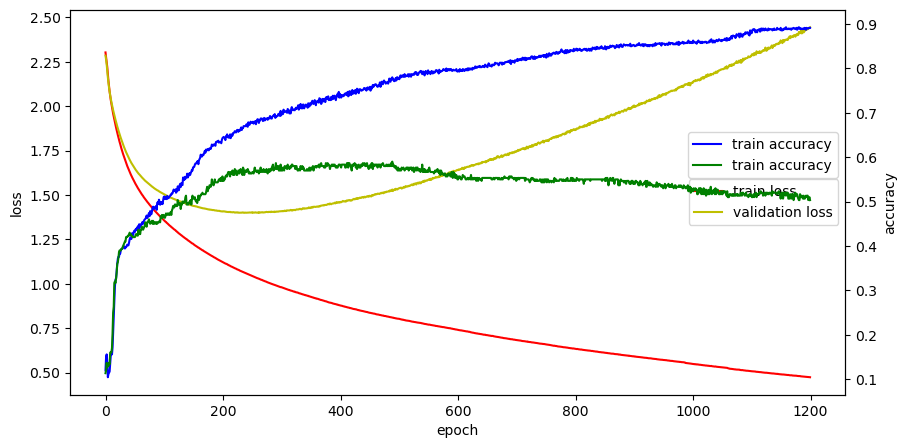

In [60]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize = (10, 5))
loss_ax.plot(hist.history['loss'], 
             'r', 
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 
             'y', 
             label = 'validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 
            'g', 
            label = 'train accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'center right')
acc_ax.legend(bbox_to_anchor = (0.999, 0.7))
plt.show()

## ※ Callback Function 1

In [73]:
# 너무 자주 로그를 출력하면 지저분해질 수 있으니, 특정 epoch 간격마다 로그를 출력하도록 제한
# Class 상속받기
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 epoch 종료 시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs = {}):
        self.epoch += 1
        if self.epoch % 50 == 0:
            print('epoch: {}\nloss: {}\nacc: {}\nval_loss:{}\nval_acc: {}\n'.\
                 format(self.epoch, 
                        logs.get('loss'), 
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy'),
                       ))
# 1. Dataset 준비
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# train dataset(60,000개)에서 train(50,000개), validation(10,000개) 분리
X_val   = X_train[50000:]
Y_val   = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리: (50000, 28, 28) → (50000, 784) → float 형변환 → Scale 조정(255.0으로 나누기)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
X_train.shape, X_val.shape, X_test.shape

# train dataset(50,000)과 validation dataset(10,000)만 -> 700개 300개만 random으로 choice
# 0 ~ 49999까지 700개 난수(비복원추출)를 index로 사용
train_idxs = np.random.choice(50000, 700)
val_idxs   = np.random.choice(10000, 300)  

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]

# One-Hot Encoding
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)
# print('One-Hot Encoding 후:', Y_train.shape, Y_val.shape, Y_test.shape)

# 2. Model 구성
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 2,
                activation = 'relu'))
model.add(Dense(units = 10,
                activation = 'softmax')) # 종속변수 합이 1(확률 합이 1)
# model.summary()

# 3. Training Process Setting
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])

# 4. Training(Callback Function 적용)
customHistory = CustomHistory() # 객체 생성
hist = model.fit(X_train, Y_train, 
                 epochs = 1200, 
                 batch_size = 100,
                 validation_data = (X_val, Y_val),
                 verbose = 0,
                 callbacks = [customHistory], ) # callback 객체는 list로 넣기

One-Hot Encoding 후: (700, 10) (300, 10) (10000, 10)
epoch: 50
loss: 1.6714719533920288
acc: 0.33714285492897034
val_loss:1.7708512544631958
val_acc: 0.27000001072883606

epoch: 100
loss: 1.4189804792404175
acc: 0.5
val_loss:1.5634651184082031
val_acc: 0.4633333384990692

epoch: 150
loss: 1.2779648303985596
acc: 0.522857129573822
val_loss:1.4912534952163696
val_acc: 0.46000000834465027

epoch: 200
loss: 1.1899526119232178
acc: 0.5385714173316956
val_loss:1.471329689025879
val_acc: 0.476666659116745

epoch: 250
loss: 1.1274018287658691
acc: 0.5657142996788025
val_loss:1.4853789806365967
val_acc: 0.47999998927116394

epoch: 300
loss: 1.0774645805358887
acc: 0.5799999833106995
val_loss:1.5201698541641235
val_acc: 0.4533333480358124

epoch: 350
loss: 1.0351139307022095
acc: 0.5899999737739563
val_loss:1.577128529548645
val_acc: 0.4466666579246521

epoch: 400
loss: 0.9964897632598877
acc: 0.6085714101791382
val_loss:1.6508780717849731
val_acc: 0.4399999976158142

epoch: 450
loss: 0.962867081

In [69]:
dict_data = {'name':'홍', 'age':25}
dict_data['name'], dict_data.get('address')

('홍', None)

## ※ Callback Function 2 - Early Stopping
- val_loss 값이 늘어나면 지정한 epoch를 다 수행하기 전에 종료

In [76]:
# Class 존재
import tensorflow.keras.callbacks as callbacks
class CustomHistory(callbacks.Callback): # on_epoch_end()는 각 epoch 종료 시 자동 호출
    def __init__(self): # 생성자 함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs = {}):
        self.epoch += 1
        if self.epoch % 50 == 0:
            print('epoch: {}\nloss: {}\nacc: {}\nval_loss:{}\nval_acc: {}\n'.\
                 format(self.epoch, 
                        logs.get('loss'), 
                        logs.get('accuracy'),
                        logs.get('val_loss'),
                        logs.get('val_accuracy'),
                       ))
# 1. Dataset 준비
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# train dataset(60,000개)에서 train(50,000개), validation(10,000개) 분리
X_val   = X_train[50000:]
Y_val   = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

# 독립변수 전처리: (50000, 28, 28) → (50000, 784) → float 형변환 → Scale 조정(255.0으로 나누기)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(-1, 784).astype('float32') / 255.0
X_test  = X_test.reshape(-1, 784).astype('float32') / 255.0
# X_train.shape, X_val.shape, X_test.shape

# train dataset(50,000)과 validation dataset(10,000)만 -> 700개 300개만 random으로 choice
# 0 ~ 49999까지 700개 난수(비복원추출)를 index로 사용
train_idxs = np.random.choice(50000, 700)
val_idxs   = np.random.choice(10000, 300)  

X_train = X_train[train_idxs]
Y_train = Y_train[train_idxs]
X_val   = X_val[val_idxs]
Y_val   = Y_val[val_idxs]

# One-Hot Encoding
Y_train = to_categorical(Y_train, 10)
Y_val   = to_categorical(Y_val)
Y_test  = to_categorical(Y_test)
# print('One-Hot Encoding 후:', Y_train.shape, Y_val.shape, Y_test.shape)

# 2. Model 구성
model = Sequential()
model.add(Input(shape = (784,)))
model.add(Dense(units = 2,
                activation = 'relu'))
model.add(Dense(units = 10,
                activation = 'softmax')) # 종속변수 합이 1(확률 합이 1)
# model.summary()

# 3. Training Process Setting
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'nadam',
              metrics = ['accuracy'])

# 4. Training(Callback Function 적용)
from tensorflow.keras.callbacks import EarlyStopping
# 객체 생성
# val_loss가 연달아 2번 이상 성능이 좋아지지 않으면 stop(통상 patience는 20 설정)
earlyStopping = EarlyStopping(patience = 2) 
hist = model.fit(X_train, Y_train, 
                 epochs = 1200, 
                 batch_size = 100,
                 validation_data = (X_val, Y_val),
                 callbacks = [earlyStopping], ) # callback 객체는 list로 넣기

Epoch 1/1200
7/7 [==============================] - 1s 36ms/step - loss: 2.2835 - accuracy: 0.1386 - val_loss: 2.2654 - val_accuracy: 0.1100
Epoch 2/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2498 - accuracy: 0.1300 - val_loss: 2.2272 - val_accuracy: 0.1600
Epoch 3/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.2093 - accuracy: 0.1557 - val_loss: 2.1895 - val_accuracy: 0.1700
Epoch 4/1200
7/7 [==============================] - 0s 13ms/step - loss: 2.1713 - accuracy: 0.1800 - val_loss: 2.1559 - val_accuracy: 0.1800
Epoch 5/1200
7/7 [==============================] - 0s 11ms/step - loss: 2.1373 - accuracy: 0.1957 - val_loss: 2.1289 - val_accuracy: 0.1967
Epoch 6/1200
7/7 [==============================] - 0s 14ms/step - loss: 2.1078 - accuracy: 0.2171 - val_loss: 2.1034 - val_accuracy: 0.2033
Epoch 7/1200
7/7 [==============================] - 0s 16ms/step - loss: 2.0803 - accuracy: 0.2286 - val_loss: 2.0810 - val_accuracy: 0.2600
Epoch 8/1200


Epoch 59/1200
7/7 [==============================] - 0s 12ms/step - loss: 1.5603 - accuracy: 0.4771 - val_loss: 1.7549 - val_accuracy: 0.4300
Epoch 60/1200
7/7 [==============================] - 0s 15ms/step - loss: 1.5552 - accuracy: 0.4843 - val_loss: 1.7514 - val_accuracy: 0.4267
Epoch 61/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.5501 - accuracy: 0.4843 - val_loss: 1.7494 - val_accuracy: 0.4300
Epoch 62/1200
7/7 [==============================] - 0s 15ms/step - loss: 1.5452 - accuracy: 0.4843 - val_loss: 1.7466 - val_accuracy: 0.4333
Epoch 63/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.5417 - accuracy: 0.4886 - val_loss: 1.7450 - val_accuracy: 0.4233
Epoch 64/1200
7/7 [==============================] - 0s 13ms/step - loss: 1.5363 - accuracy: 0.4900 - val_loss: 1.7448 - val_accuracy: 0.4300
Epoch 65/1200
7/7 [==============================] - 0s 14ms/step - loss: 1.5304 - accuracy: 0.4900 - val_loss: 1.7448 - val_accuracy: 0.4267
Epoch 

## 위 모델(DNN)dml accuracy 늘리기
 - 데이터 확보
 - layer
 - activation function: 은닉층에 주로 ReLU, ELU, neaky ReLU
 - optimizer, epoch 등을 조정